# Language Processing Pipeline in Spacy

In spaCy, the Language Processing Pipeline (also called the NLP pipeline) is a sequence of components that process text step by step. When you pass a text to nlp(text), spaCy runs it through this pipeline to produce a Doc object enriched with linguistic information.

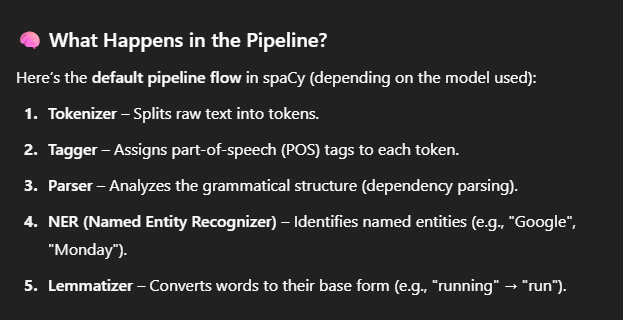

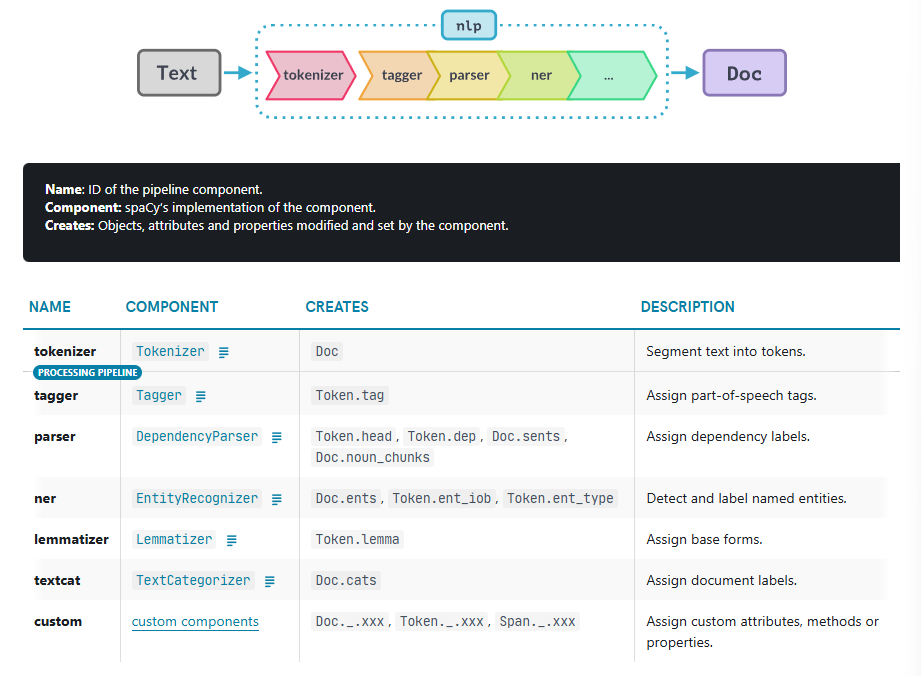

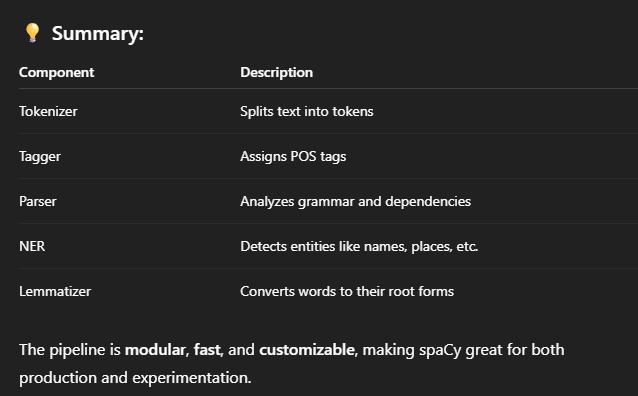

### 1. Blank Pipeline

In [9]:

import spacy

Lang = spacy.blank("en")

Doc = Lang("Captain america ate 100$ of samosa. Then he said I can do this all day.")

for token in Doc:
    print(token)

# Pipeline

Pipeline = Lang.pipe_names
print('\nPipeline :',Pipeline)


Captain
america
ate
100
$
of
samosa
.
Then
he
said
I
can
do
this
all
day
.

Pipeline : []


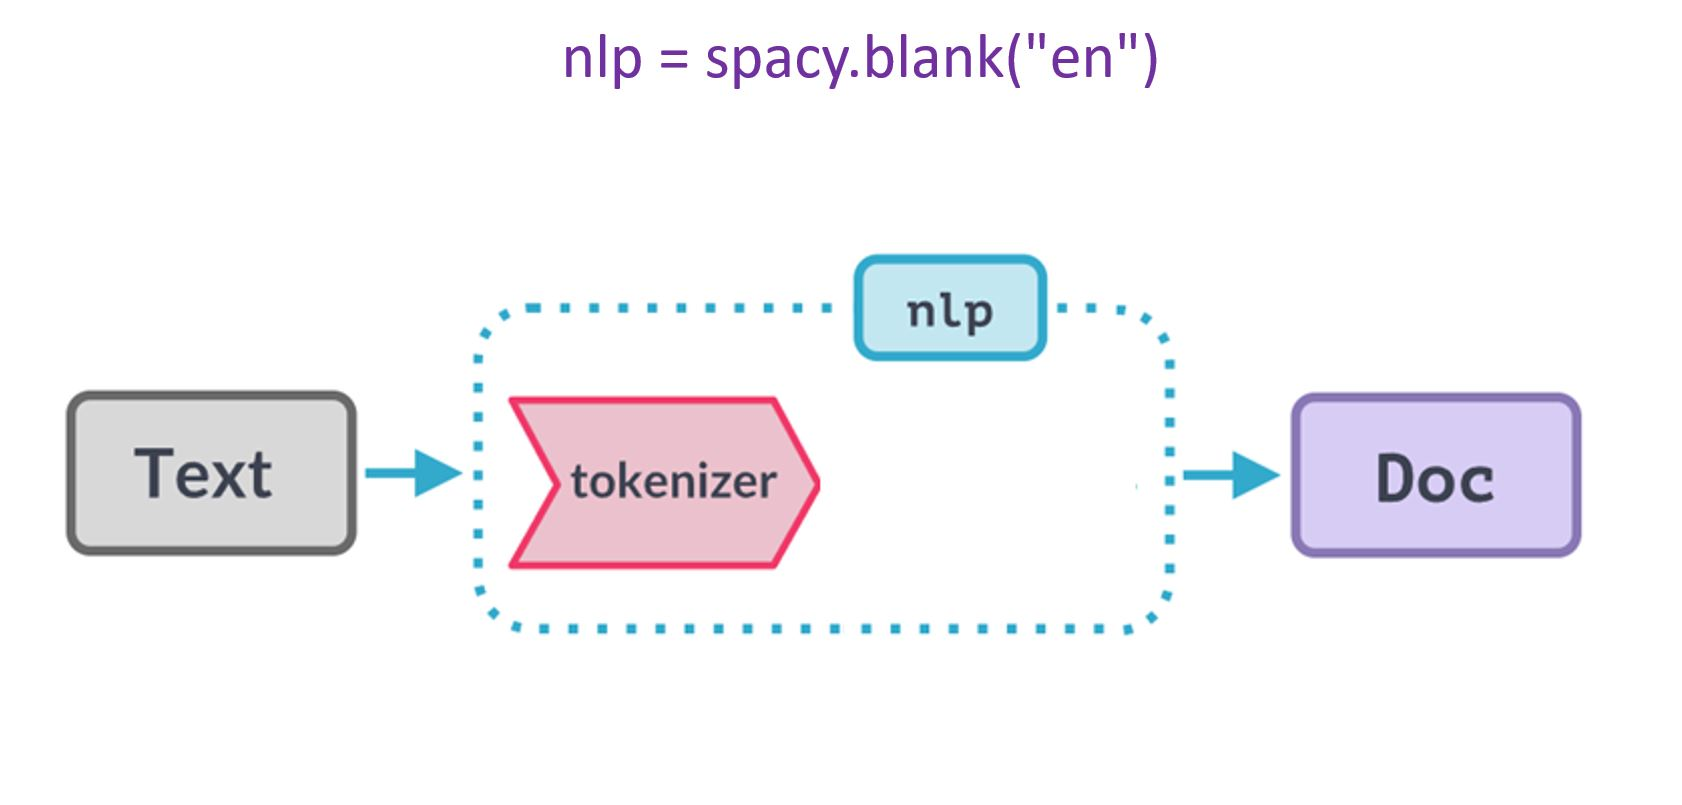

### 2. Download trained pipeline

To download trained pipeline use a command such as,

python -m spacy download en_core_web_sm

This downloads the small (sm) pipeline for english language

Further instructions on : https://spacy.io/usage/models#quickstart

In [26]:

import spacy

Lang = spacy.load("en_core_web_sm")


# Pipeline

Pipeline = Lang.pipe_names
print('\nPipeline :',Pipeline)


Doc = Lang("Captain america ate 100$ of samosa. Then he said I can do this all day.")

for token in Doc:
    print('\n', token, " | ", spacy.explain(token.pos_), " | ", token.lemma_)



Pipeline : ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

 Captain  |  proper noun  |  Captain

 america  |  proper noun  |  america

 ate  |  verb  |  eat

 100  |  numeral  |  100

 $  |  numeral  |  $

 of  |  adposition  |  of

 samosa  |  proper noun  |  samosa

 .  |  punctuation  |  .

 Then  |  adverb  |  then

 he  |  pronoun  |  he

 said  |  verb  |  say

 I  |  pronoun  |  I

 can  |  auxiliary  |  can

 do  |  verb  |  do

 this  |  pronoun  |  this

 all  |  determiner  |  all

 day  |  noun  |  day

 .  |  punctuation  |  .


In [66]:
# Named Entity Recognition

import spacy

# Load an English NLP model

nlp = spacy.load("en_core_web_sm")  # You may need to install this with: python -m spacy download en_core_web_sm

# Process the text

doc = nlp("Tesla Inc is going to acquire twitter for $45 billion")

# Check if any entities were found

for ent in doc.ents:
    
    print('Named Entity Recognition:', ent.text,'|', ent.label_,'|', spacy.explain(ent.label_))


Named Entity Recognition: Tesla Inc | ORG | Companies, agencies, institutions, etc.
Named Entity Recognition: $45 billion | MONEY | Monetary values, including unit


In [68]:
# To visualize NER

from spacy import displacy

displacy.render(doc, style = "ent")


### 3. Trained processing pipeline in French

In [73]:
# Download french language pipeline

import spacy

spacy.cli.download("fr_core_news_sm")


✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [85]:

import spacy

nlp = spacy.load("fr_core_news_sm")

doc = nlp("Tesla Inc va racheter Twitter pour $45 milliards de dollars")


# Named Entity Recognition

for ent in doc.ents:

     print('NER:', ent.text,'|', ent.label_,'|', spacy.explain(ent.label_))


# To visualize NER

from spacy import displacy  

print('\n')
displacy.render(doc, style = "ent")


# Tokens

for token in doc:

        print('\nToekns :', token.text, token.pos_, token.lemma_)


NER: Tesla Inc | PER | Named person or family.
NER: Twitter | MISC | Miscellaneous entities, e.g. events, nationalities, products or works of art





Toekns : Tesla PROPN Tesla

Toekns : Inc PROPN Inc

Toekns : va VERB aller

Toekns : racheter VERB racheter

Toekns : Twitter VERB twitter

Toekns : pour ADP pour

Toekns : $ NOUN dollar

Toekns : 45 NUM 45

Toekns : milliards NOUN milliard

Toekns : de ADP de

Toekns : dollars NOUN dollar


### 4. Adding a component to a blank pipeline

In [103]:
# Blank pipeline

import spacy

nlp = spacy.blank("en")

Pipeline = nlp.pipe_names
print('Before Adding a component:', Pipeline)


# Adding a component

source_nlp = spacy.load("en_core_web_sm")

nlp.add_pipe("ner", source=source_nlp)

Pipeline1 = nlp.pipe_names
print('After Adding a component:', Pipeline1)


# Named Entity Recognition

doc = nlp("Tesla Inc is going to acquire twitter for $45 billion")

for ent in doc.ents:

    print('\nNER:',ent.text,'|', ent.label_,'|', spacy.explain(ent.label_))


# To Visualize NER

from spacy import displacy

print('\n')
displacy.render(doc, style = "ent")


Before Adding a component: []
After Adding a component: ['ner']

NER: Tesla Inc | ORG | Companies, agencies, institutions, etc.

NER: $45 billion | MONEY | Monetary values, including unit




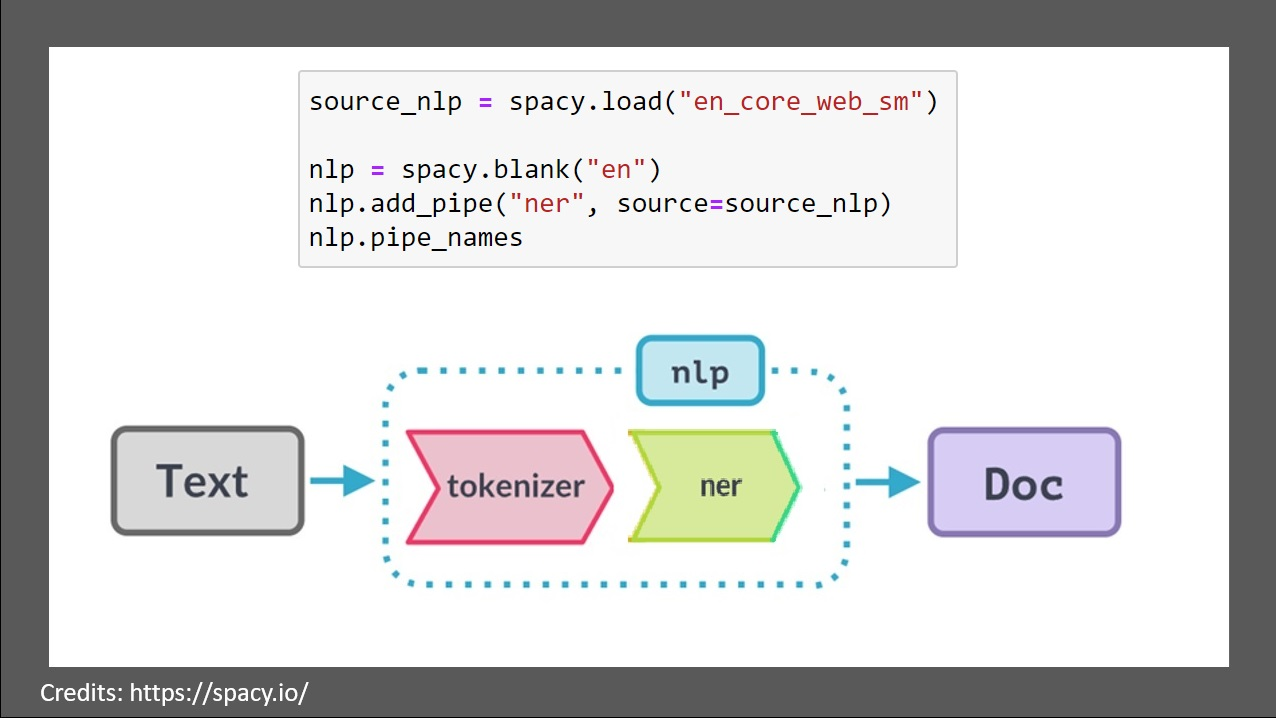